In [85]:
#import relevant librariesimport pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
from pathlib import Path

In [2]:
#Folder to store project images for presentation file

IMAGES_PATH = Path() / "images" / "house_price_prediction_final_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
#Defining the default font sizes to plot figures
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

### Data Collection and Inspection

In [4]:
House_price_df = pd.read_csv("Housing.csv") #Load dataset

In [5]:
House_price_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
# Check for missing values
print(House_price_df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
# Check data types
print(House_price_df.dtypes)

# Convert categorical variables to category data type
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
House_price_df[categorical_columns] = House_price_df[categorical_columns].astype('category')

# Verify the conversion
print(House_price_df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object


In [8]:
# Convert all string values in categorical columns to lowercase
House_price_df[categorical_columns] = House_price_df[categorical_columns].apply(lambda x: x.str.lower())

# Verify the conversion
print(House_price_df[categorical_columns].head())

  mainroad guestroom basement hotwaterheating airconditioning prefarea  \
0      yes        no       no              no             yes      yes   
1      yes        no       no              no             yes       no   
2      yes        no      yes              no              no      yes   
3      yes        no      yes              no             yes      yes   
4      yes       yes      yes              no             yes       no   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  


###  Exploratory Data Analysis (EDA)

In [9]:
print(House_price_df.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


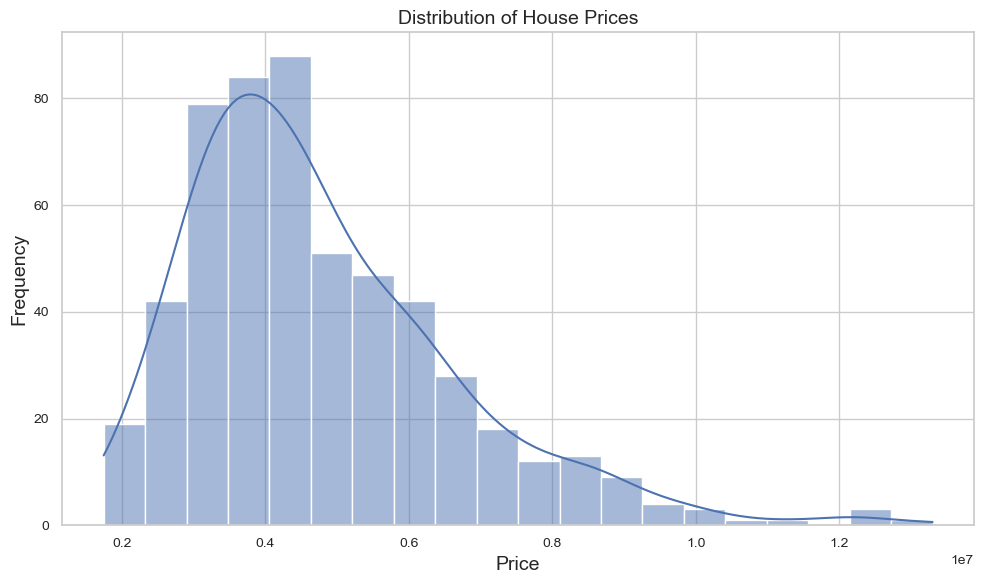

In [10]:
# Distribution of the target variable 'price'

# Function to calculate the Freedman-Diaconis bin width
def freedman_diaconis_bin_width(data):
    q25, q75 = np.percentile(data, [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr / np.cbrt(len(data))
    return bin_width

# Calculate the bin width for the price column
bin_width = freedman_diaconis_bin_width(House_price_df['price'])
num_bins = int((House_price_df['price'].max() - House_price_df['price'].min()) / bin_width)

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(House_price_df['price'], bins=num_bins, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
save_fig("price_distribution_adjusted")
plt.show()

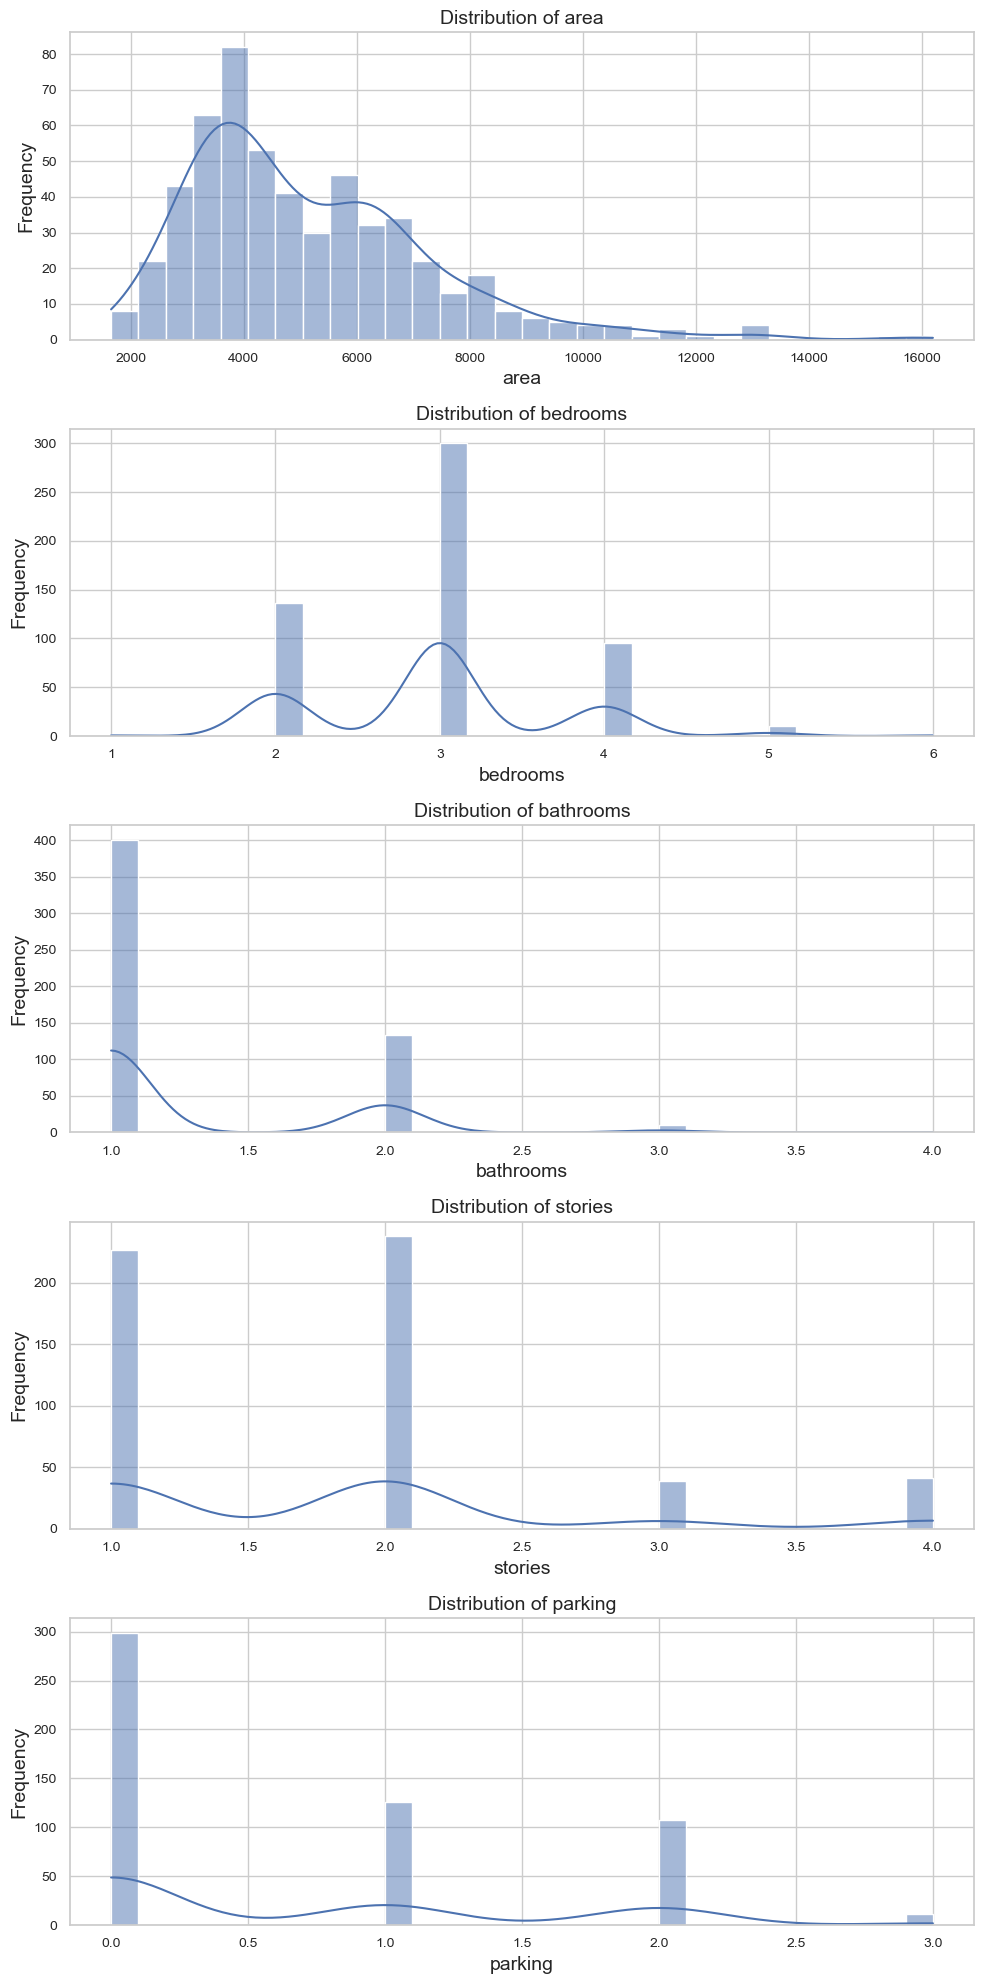

In [11]:
# Distribution of numerical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 20))

for i, feature in enumerate(numerical_features):
    sns.histplot(House_price_df[feature], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

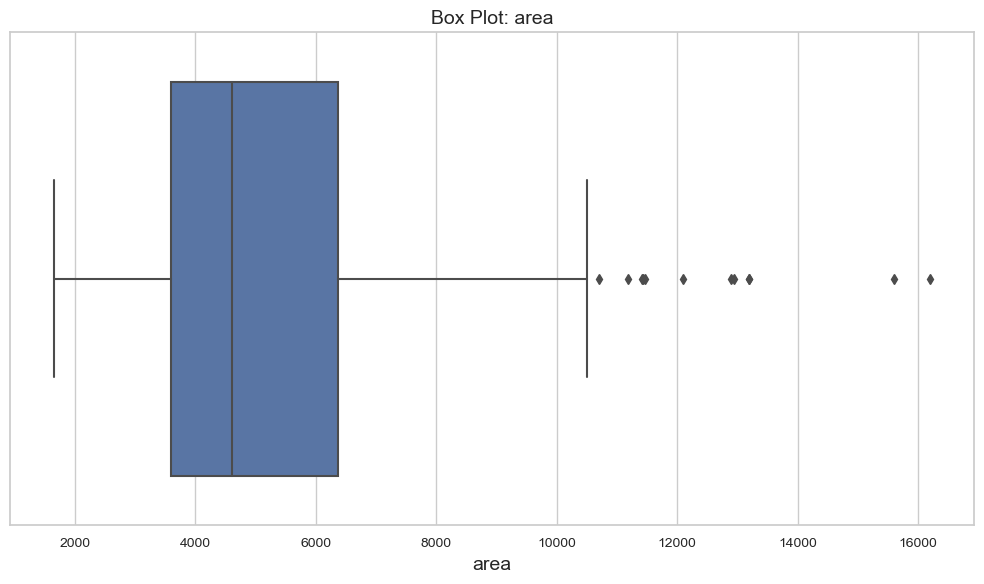

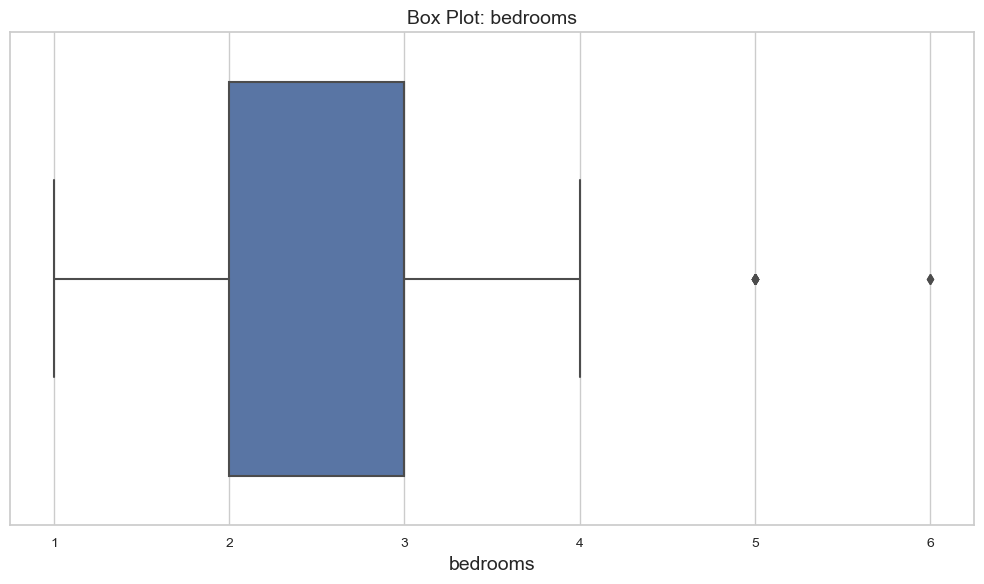

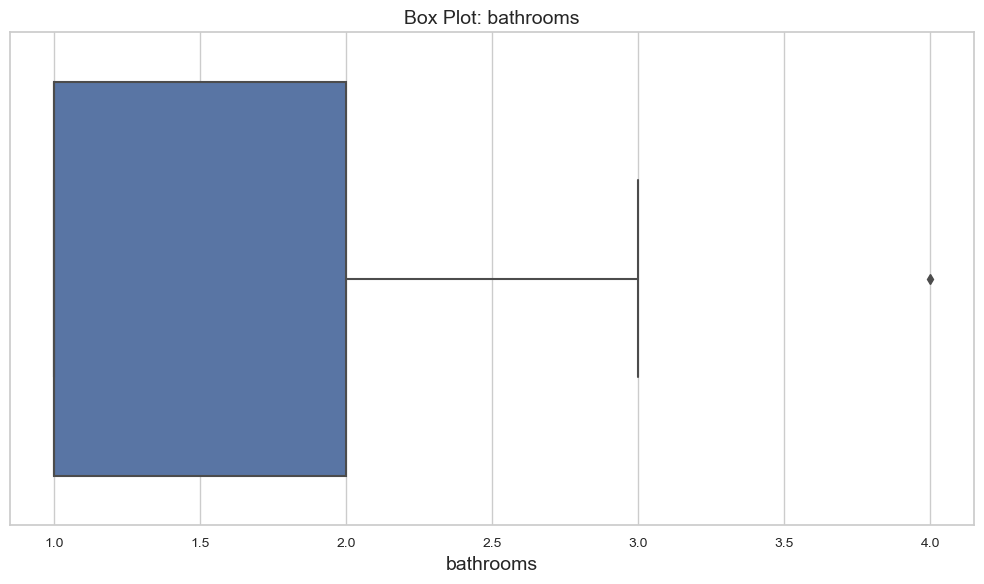

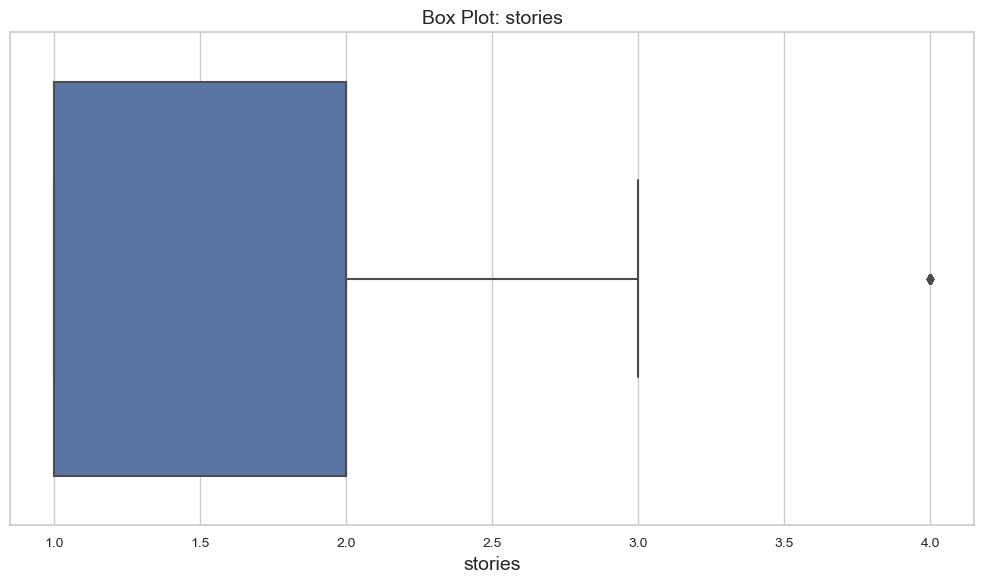

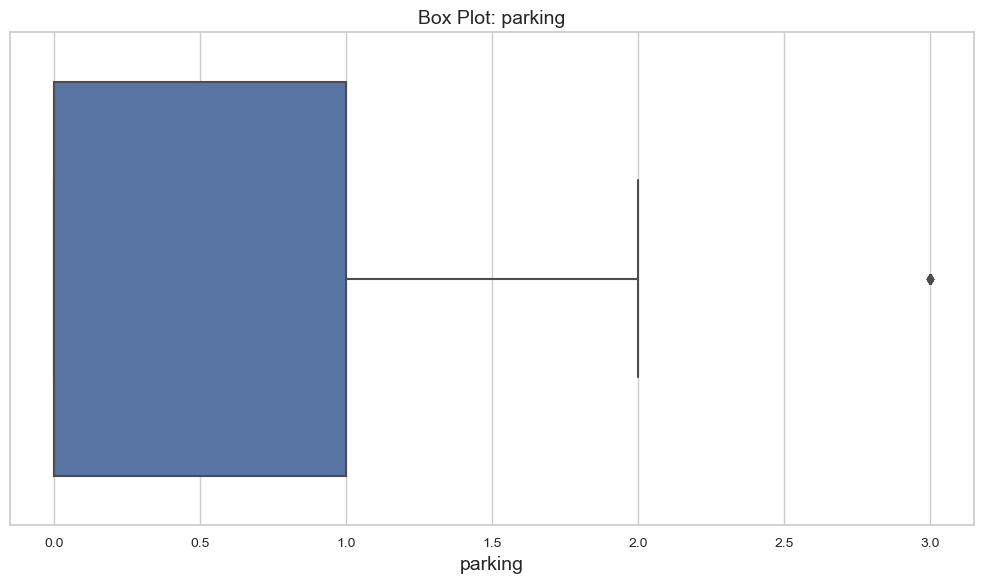

In [12]:
# Identify outliers using box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=House_price_df[feature])
    plt.title(f'Box Plot: {feature}')
    plt.xlabel(feature)
    save_fig(f"{feature}_boxplot")
    plt.show()


### Feature Engineering

In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
# Create new features
House_price_df['total_rooms'] = House_price_df['bedrooms'] + House_price_df['bathrooms']
House_price_df['area_to_price_ratio'] = House_price_df['area'] / House_price_df['price']

In [50]:
# Task 3.2: Encode categorical variables
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_features = [col for col in House_price_df.columns if col not in categorical_features]

# Define the transformer for categorical data
categorical_transformer = OneHotEncoder(sparse=False, drop='first')  # drop='first' to handle dummy variable trap

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'  # Keep other features (i.e., numerical ones) unchanged
)

In [51]:
# Apply the transformations
House_price_prepared = preprocessor.fit_transform(House_price_df)

C:\Users\nofil\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
# Convert the preprocessed data back to a DataFrame
encoded_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_features = numerical_features + list(encoded_features)
House_price_prepared_df = pd.DataFrame(House_price_prepared, columns=all_features)

In [53]:
# Add the target variable back to the DataFrame
House_price_prepared_df['price'] = House_price_df['price'].values

In [54]:
all_features

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'parking',
 'total_rooms',
 'area_to_price_ratio',
 'mainroad_yes',
 'guestroom_yes',
 'basement_yes',
 'hotwaterheating_yes',
 'airconditioning_yes',
 'prefarea_yes',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [55]:
print(f"Number of features: {len(all_features)}")

Number of features: 16


In [56]:
House_price_prepared

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00000000e+00, 6.00000000e+00, 5.57894737e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.00000000e+00, 8.00000000e+00, 7.31428571e-04],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 5.00000000e+00, 8.13061224e-04],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.00000000e+00, 2.06857143e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+00, 1.66285714e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.00000000e+00, 2.20000000e-03]])

In [57]:
numerical_features

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'parking',
 'total_rooms',
 'area_to_price_ratio']

### Model Training and Evaluation

##### Split the Dataset into Training and Testing Sets

In [59]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X and the target variable y
X = House_price_prepared_df.drop('price', axis=1)
y = House_price_prepared_df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (436, 15)
Testing set size: (109, 15)


#### Choose and Justify the Selection of Machine Learning Algorithms


We'll consider the following algorithms for this regression problem:

Linear Regression: A simple and interpretable model.

Decision Tree: Captures non-linear relationships.

Random Forest: An ensemble method that improves performance and reduces overfitting.

Gradient Boosting: Another powerful ensemble method that often yields strong performance.


#### Train Multiple Models and Evaluate Their Performance

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [63]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)}


In [64]:
# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

In [65]:
# Train and evaluate models
for name, model in models.items():
    rmse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.2f}")

Linear Regression: RMSE = 0.00, MAE = 0.00, R² = 1.00
Decision Tree: RMSE = 186890.37, MAE = 45532.11, R² = 0.99
Random Forest: RMSE = 196854.26, MAE = 41907.39, R² = 0.99
Gradient Boosting: RMSE = 182556.34, MAE = 36612.95, R² = 0.99


In [66]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

# Hyperparameter tuning for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [70]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)



Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [72]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": dt_grid_search.best_estimator_,
    "Random Forest": rf_grid_search.best_estimator_,
    "Gradient Boosting": gb_grid_search.best_estimator_    
}

# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

# Train and evaluate models
for name, model in models.items():
    rmse, mae, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name}: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.2f}")

Linear Regression: RMSE = 0.00, MAE = 0.00, R² = 1.00
Decision Tree: RMSE = 163576.37, MAE = 49808.75, R² = 0.99
Random Forest: RMSE = 206772.28, MAE = 43023.71, R² = 0.99
Gradient Boosting: RMSE = 182556.34, MAE = 36612.95, R² = 0.99


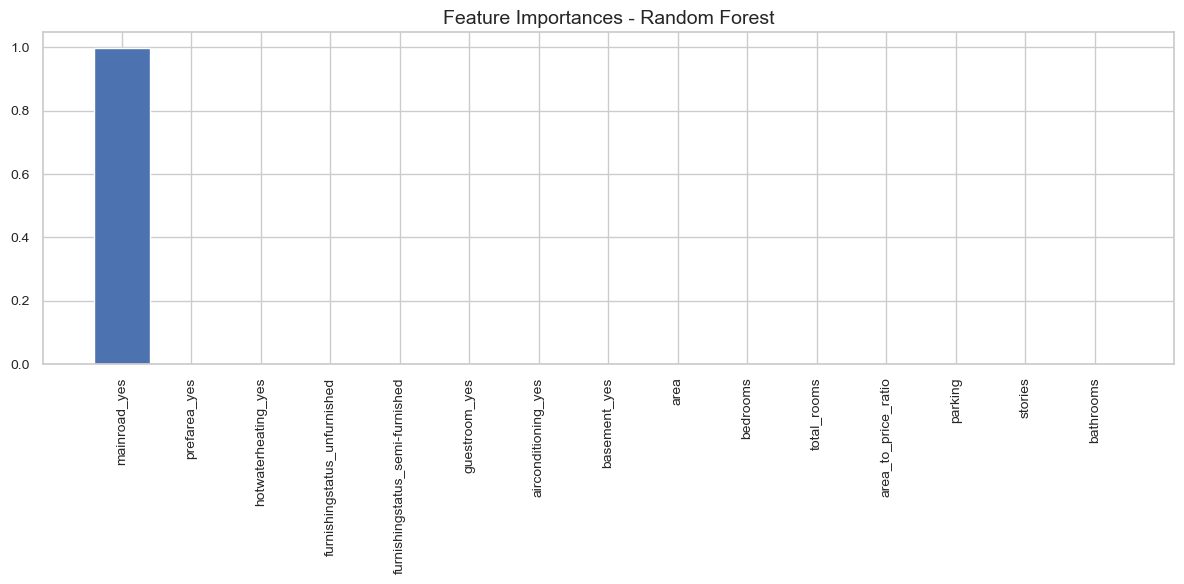

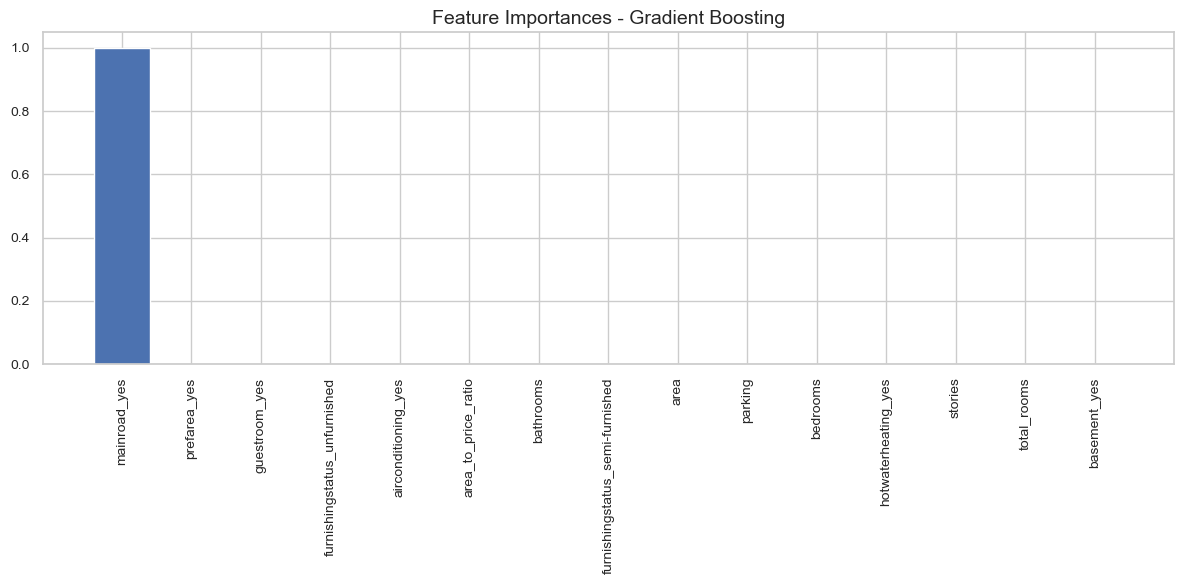

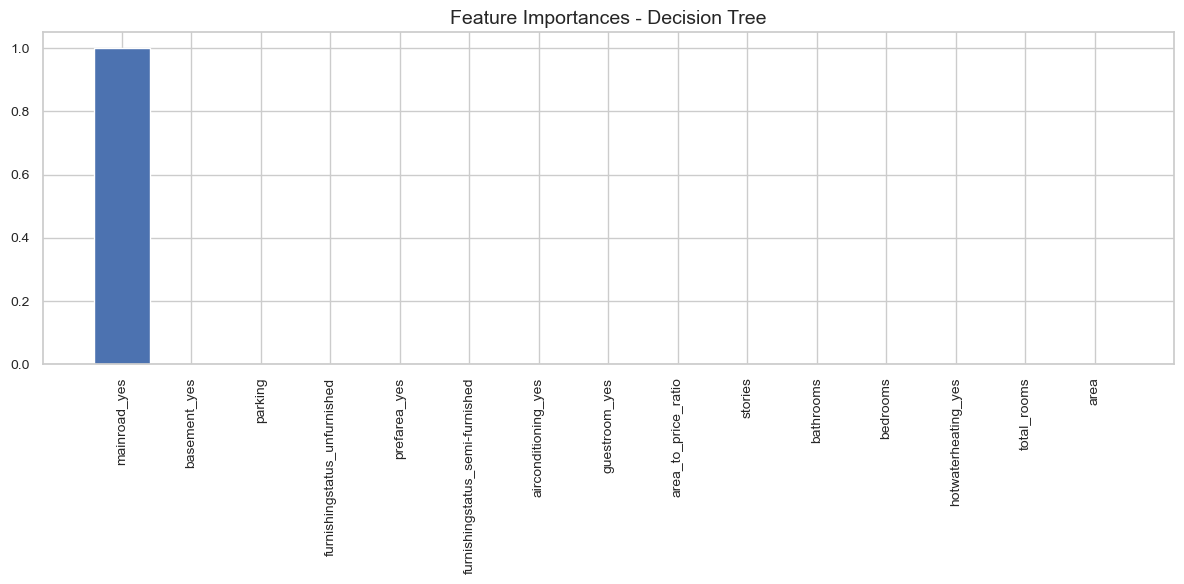

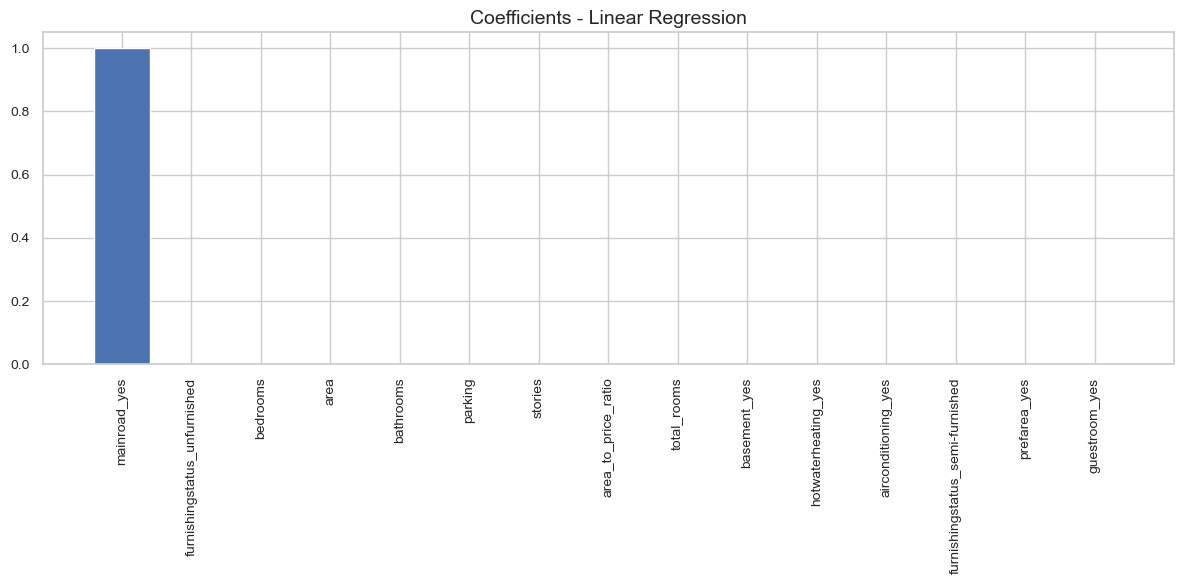

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot feature importances
def plot_feature_importances(importances, features, model_name, fig_id):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importances - {model_name}")
    plt.bar(range(len(features)), importances[indices], align="center")
    plt.xticks(range(len(features)), features[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Feature importance for Random Forest
plot_feature_importances(models["Random Forest"].feature_importances_, X.columns, "Random Forest", "feature_importances_rf")

# Feature importance for Gradient Boosting
plot_feature_importances(models["Gradient Boosting"].feature_importances_, X.columns, "Gradient Boosting", "feature_importances_gb")

# Feature importance for Decision Tree
plot_feature_importances(models["Decision Tree"].feature_importances_, X.columns, "Decision Tree", "feature_importances_dt")

# Plot coefficients for Linear Regression and Ridge Regression
def plot_coefficients(coefs, features, model_name, fig_id):
    indices = np.argsort(np.abs(coefs))[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f"Coefficients - {model_name}")
    plt.bar(range(len(features)), coefs[indices], align="center")
    plt.xticks(range(len(features)), features[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Coefficients for Linear Regression
plot_coefficients(models["Linear Regression"].coef_, X.columns, "Linear Regression", "coefficients_lr")



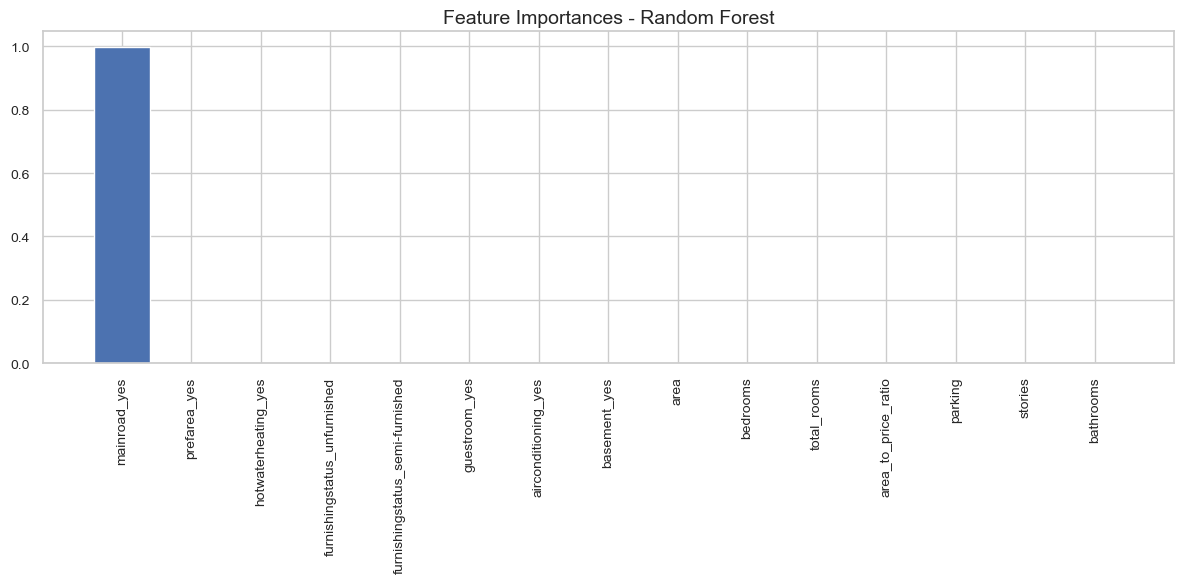

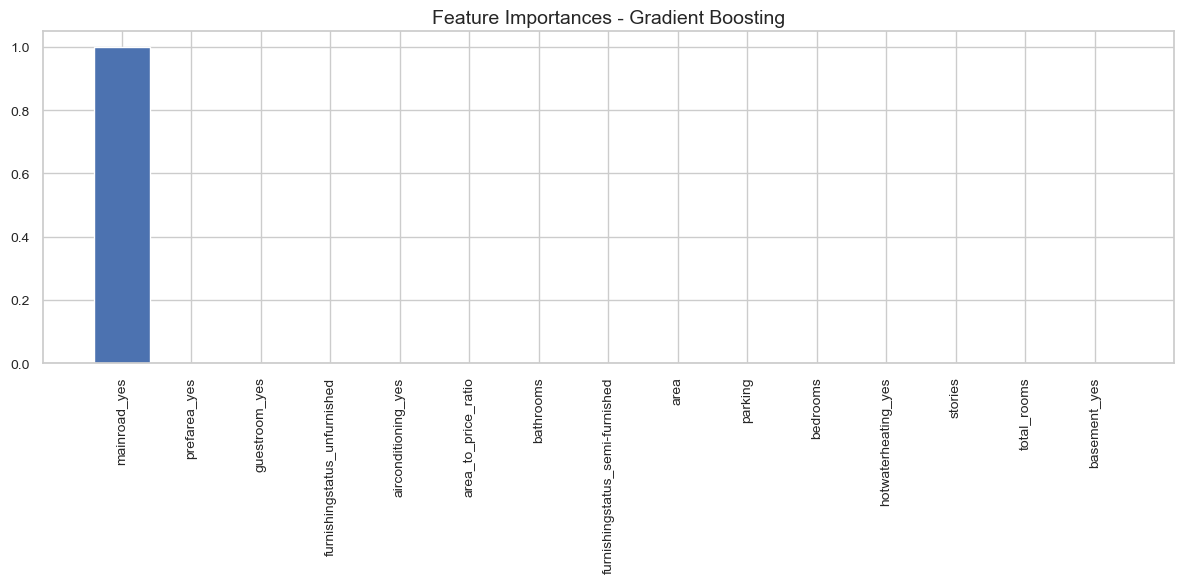

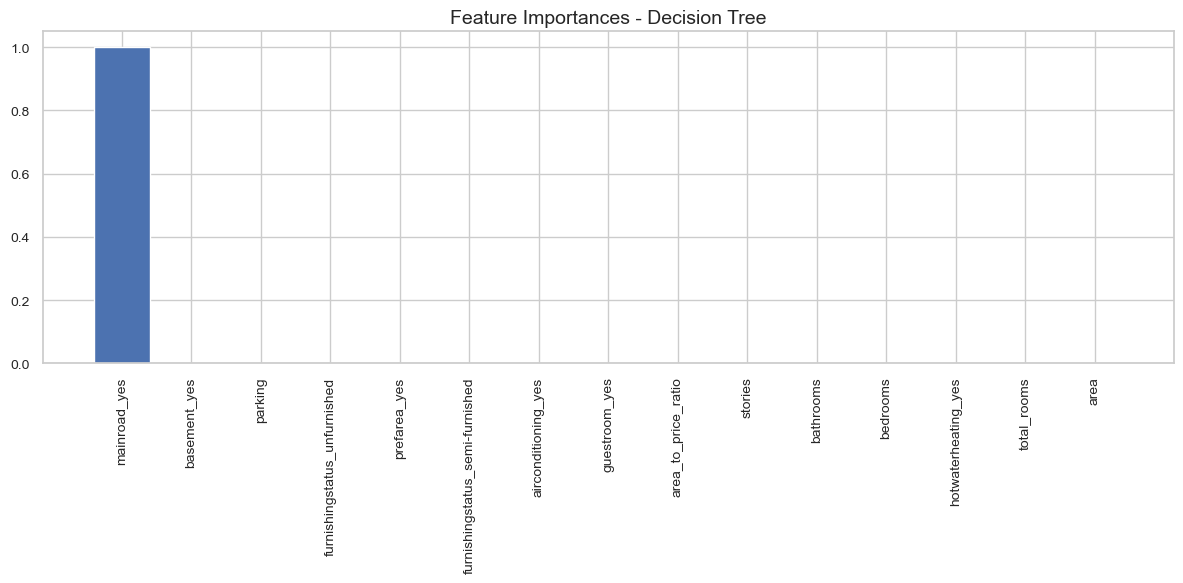

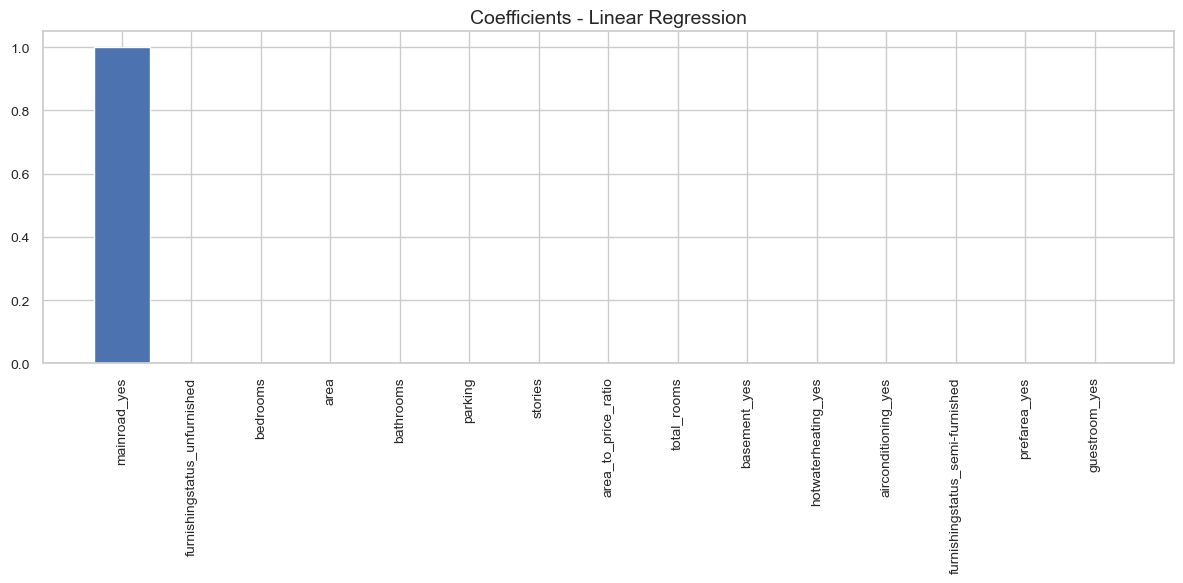

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure that the plot_feature_importances and plot_coefficients functions handle the data correctly.

# Function to plot feature importances
def plot_feature_importances(importances, features, model_name, fig_id):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importances - {model_name}")
    plt.bar(range(len(features)), importances[indices], align="center")
    plt.xticks(range(len(features)), features[indices], rotation=90)
    plt.tight_layout()
    save_fig(fig_id)
    plt.show()

# Function to plot coefficients
def plot_coefficients(coefs, features, model_name, fig_id):
    indices = np.argsort(np.abs(coefs))[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f"Coefficients - {model_name}")
    plt.bar(range(len(features)), coefs[indices], align="center")
    plt.xticks(range(len(features)), features[indices], rotation=90)
    plt.tight_layout()
    save_fig(fig_id)
    plt.show()

# Feature importance for Random Forest
plot_feature_importances(models["Random Forest"].feature_importances_, X.columns, "Random Forest", "feature_importances_rf")

# Feature importance for Gradient Boosting
plot_feature_importances(models["Gradient Boosting"].feature_importances_, X.columns, "Gradient Boosting", "feature_importances_gb")

# Feature importance for Decision Tree
plot_feature_importances(models["Decision Tree"].feature_importances_, X.columns, "Decision Tree", "feature_importances_dt")

# Plot coefficients for Linear Regression
plot_coefficients(models["Linear Regression"].coef_, X.columns, "Linear Regression", "coefficients_lr")

In [80]:
# Importances or coefficients with corresponding feature names
def print_feature_importances(importances, features, model_name):
    feature_importance_pairs = list(zip(features, importances))
    feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)
    print(f"{model_name} feature importances:")
    for feature, importance in feature_importance_pairs:
        print(f"{feature}: {importance}")
    print()

# Random Forest
print_feature_importances(models["Random Forest"].feature_importances_, X.columns, "Random Forest")

# Gradient Boosting
print_feature_importances(models["Gradient Boosting"].feature_importances_, X.columns, "Gradient Boosting")

# Decision Tree
print_feature_importances(models["Decision Tree"].feature_importances_, X.columns, "Decision Tree")

# Linear Regression coefficients
print_feature_importances(models["Linear Regression"].coef_, X.columns, "Linear Regression")

Random Forest feature importances:
mainroad_yes: 0.9969703436839017
prefarea_yes: 0.000976637400039479
hotwaterheating_yes: 0.0006355280656600489
furnishingstatus_unfurnished: 0.00047082203578538277
furnishingstatus_semi-furnished: 0.00022712378409584256
guestroom_yes: 0.00021293477364372156
airconditioning_yes: 0.00011516508022770526
basement_yes: 9.58580105931831e-05
area: 7.216550848757992e-05
bedrooms: 5.868764453857198e-05
total_rooms: 5.618691098879685e-05
area_to_price_ratio: 4.567543038979065e-05
parking: 3.311472987069171e-05
stories: 2.5172016146110716e-05
bathrooms: 4.58492563132105e-06

Gradient Boosting feature importances:
mainroad_yes: 0.9986356483558807
prefarea_yes: 0.0013557668437005955
guestroom_yes: 3.713742630384602e-06
furnishingstatus_unfurnished: 2.88899380496203e-06
airconditioning_yes: 1.0251427139549165e-06
area_to_price_ratio: 3.8228701786587244e-07
bathrooms: 1.5148174037234445e-07
furnishingstatus_semi-furnished: 1.406062019310231e-07
area: 8.2280205526906

In [81]:
# Check the distribution of mainroad_yes
print("Distribution of mainroad_yes:")
print(House_price_prepared_df['mainroad_yes'].value_counts())

# Check the distribution of other features
print("\nDistribution of other features:")
print(House_price_prepared_df.describe())

Distribution of mainroad_yes:
3500000.0     17
4200000.0     17
4900000.0     12
3150000.0      9
5600000.0      9
              ..
6580000.0      1
4319000.0      1
4375000.0      1
4382000.0      1
13300000.0     1
Name: mainroad_yes, Length: 219, dtype: int64

Distribution of other features:
              price        area    bedrooms   bathrooms     stories  \
count  5.450000e+02  545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06    0.177982    0.350459    0.045872    0.315596   
std    1.870440e+06    0.382849    0.477552    0.209399    0.465180   
min    1.750000e+06    0.000000    0.000000    0.000000    0.000000   
25%    3.430000e+06    0.000000    0.000000    0.000000    0.000000   
50%    4.340000e+06    0.000000    0.000000    0.000000    0.000000   
75%    5.740000e+06    0.000000    1.000000    0.000000    1.000000   
max    1.330000e+07    1.000000    1.000000    1.000000    1.000000   

          parking  total_rooms  area_to_price_ratio  mainroad_ye

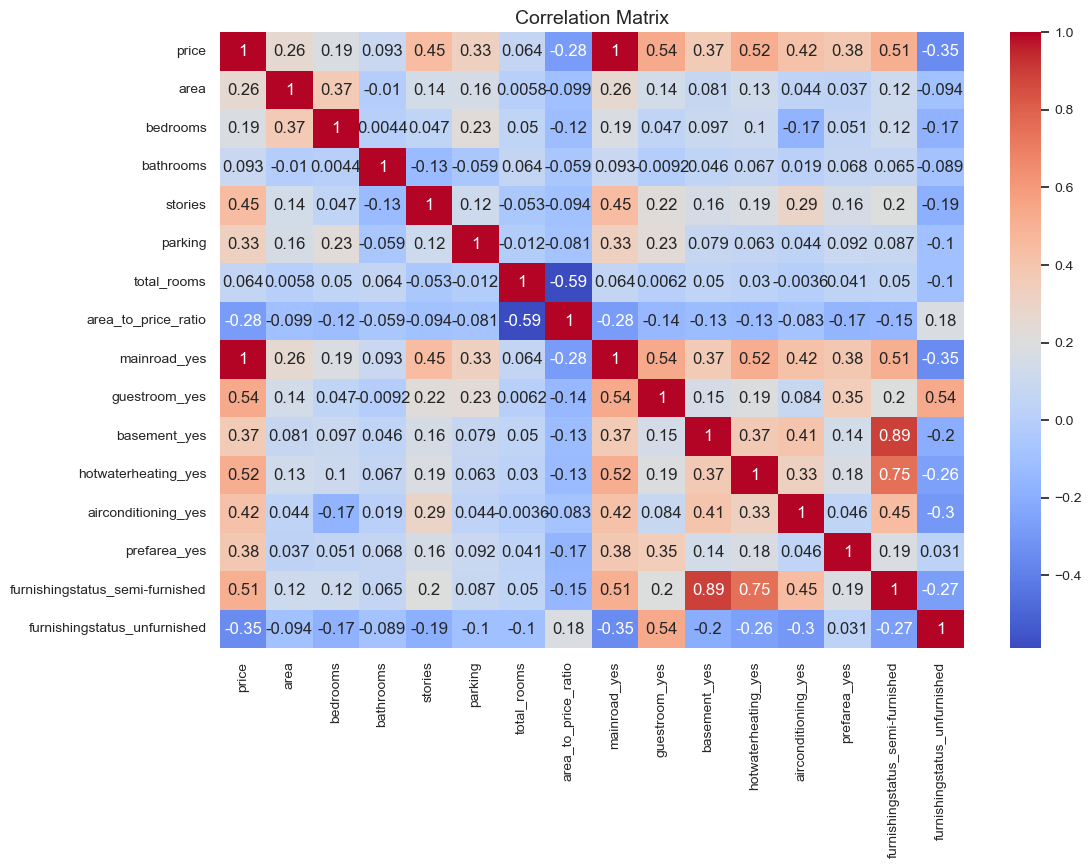

In [82]:
# Compute the correlation matrix
corr_matrix = House_price_prepared_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [83]:
#Fit a Simple Model
from sklearn.linear_model import LinearRegression

# Fit Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Print coefficients with feature names
print_feature_importances(lin_reg.coef_, X.columns, "Linear Regression")

Linear Regression feature importances:
mainroad_yes: 1.0000000000000002
area: 7.005498219977009e-10
area_to_price_ratio: 6.562651588232101e-11
hotwaterheating_yes: 2.4962175282815755e-11
airconditioning_yes: 1.6577935634289803e-11
prefarea_yes: 8.811567610160815e-12
guestroom_yes: 2.931473642641233e-14
furnishingstatus_semi-furnished: -1.6343357322131432e-11
basement_yes: -4.1305532620405535e-11
total_rooms: -6.521564392840327e-11
stories: -2.6486036044933615e-10
parking: -4.0133573870052927e-10
bathrooms: -5.62187759578828e-10
bedrooms: -1.5785400470387745e-09
furnishingstatus_unfurnished: -1.581561774465108e-07



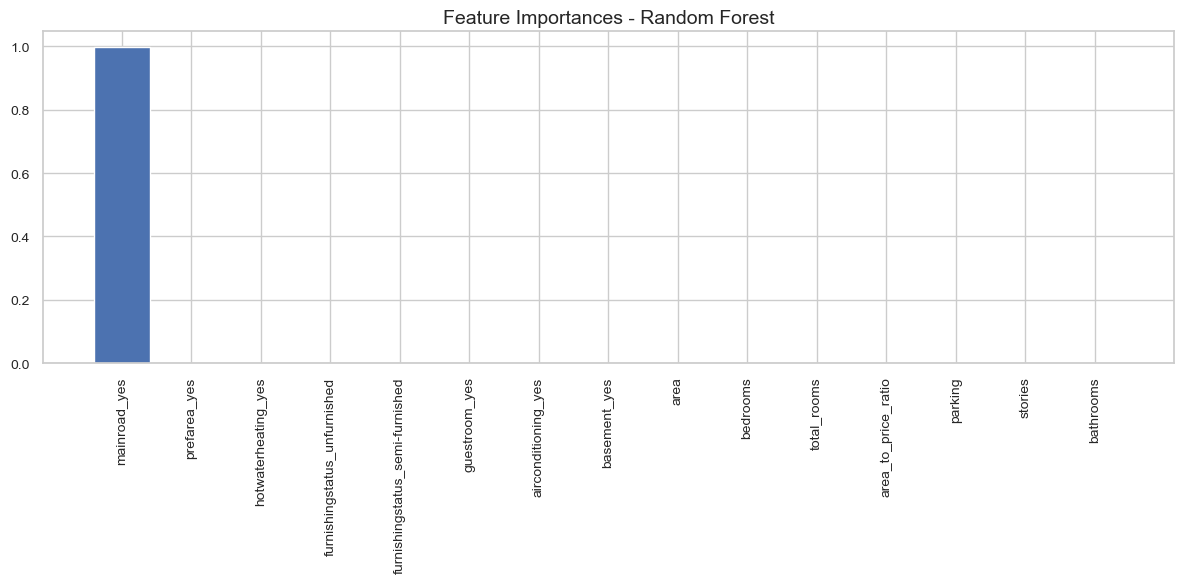

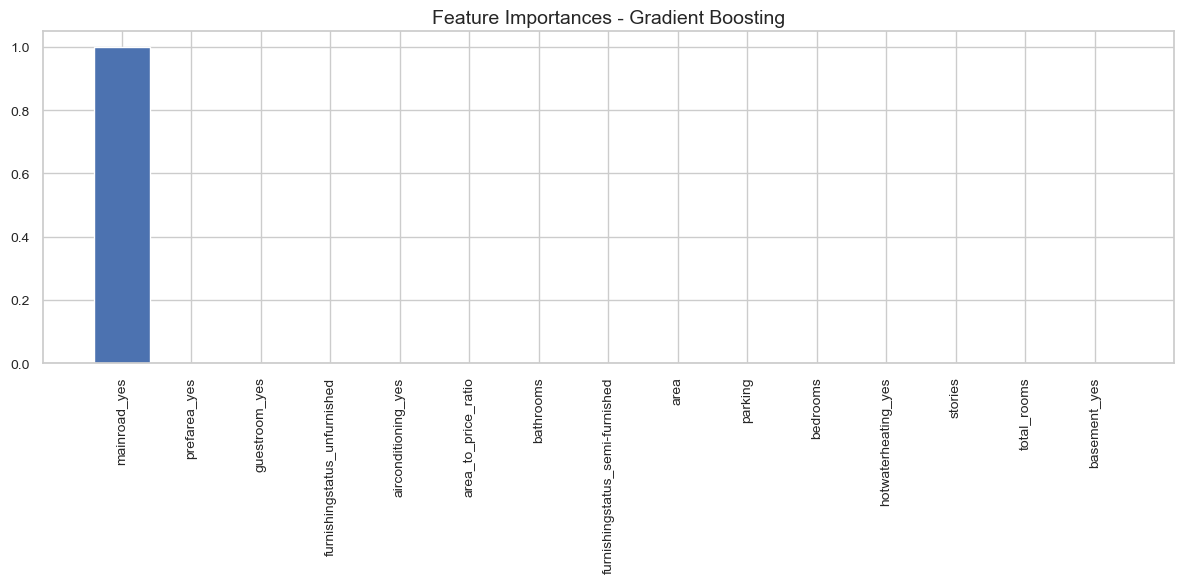

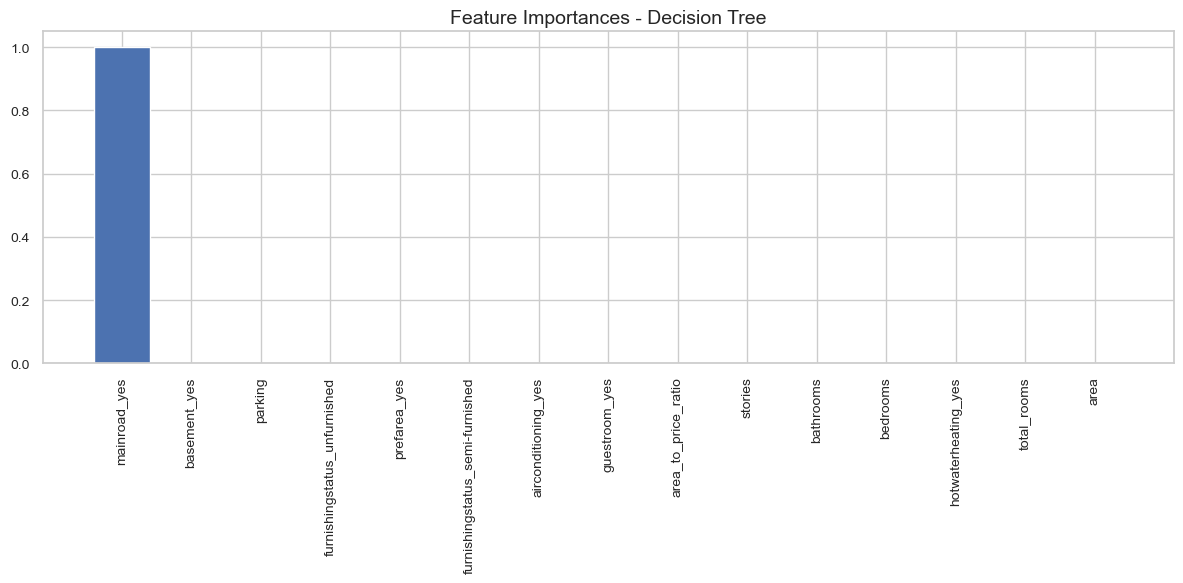

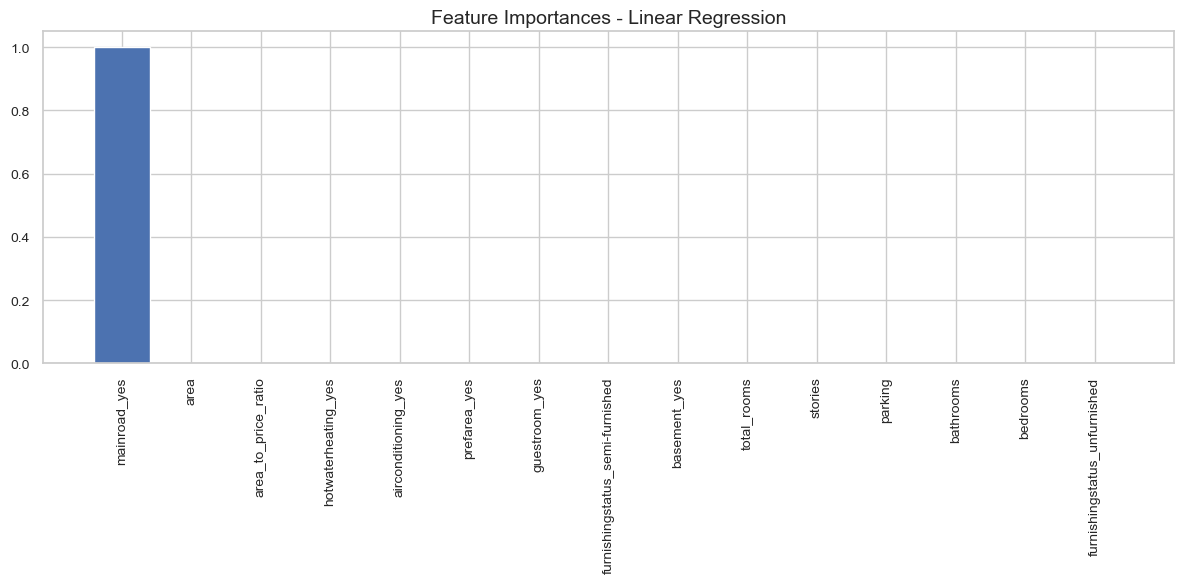

In [84]:
import matplotlib.pyplot as plt

# Feature importances plot function
def plot_feature_importances(importances, features, model_name):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importances - {model_name}")
    plt.bar(range(len(features)), importances[indices], align="center")
    plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    save_fig(f"feature_importances_{model_name.lower().replace(' ', '_')}")
    plt.show()

# Plot for Random Forest
plot_feature_importances(models["Random Forest"].feature_importances_, X.columns, "Random Forest")

# Plot for Gradient Boosting
plot_feature_importances(models["Gradient Boosting"].feature_importances_, X.columns, "Gradient Boosting")

# Plot for Decision Tree
plot_feature_importances(models["Decision Tree"].feature_importances_, X.columns, "Decision Tree")

# Plot for Linear Regression coefficients
plot_feature_importances(models["Linear Regression"].coef_, X.columns, "Linear Regression")
